In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.manifold import TSNE

In [2]:
import torch 
from torch import nn
from torch.autograd import Variable 
from torch.nn import Linear,ReLU,CrossEntropyLoss,Sequential,Conv2d,MaxPool2d,Module,LogSoftmax,BatchNorm1d,Dropout

/home/datta/python/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Question 1

In [3]:
## Architecture ##
class CNN(Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv_1= Sequential(
        # Layer-1 #
            Conv2d(1,4,kernel_size=5,stride=1,padding='same'),
            ReLU(),
            MaxPool2d(kernel_size=2,stride=2),)
        self.conv_2 = Sequential(
        # Layer-2 #
            Conv2d(4,4,kernel_size=5,stride=1,padding='same'),
            ReLU(),
            MaxPool2d(kernel_size=2,stride=2),
        )
        # MLP #
        self.linear_layers = Sequential(
            Linear(in_features = 4*7*7,out_features = 49),
            ReLU(),
            Linear(in_features=49,out_features = 10),
            ReLU(),
        ) 
    def forward(self,x):
        x = self.conv_1(x)
        x = self.conv_2(x)
        x = torch.flatten(x,1)
        x = self.linear_layers(x)
        soft = nn.LogSoftmax(dim=1)
        #x = soft(x)
        return x

In [4]:
## Function to shuffle the data ##
def shuff_data(images,labels):
    index = np.random.permutation(len(labels))
    return images[index],labels[index]

In [5]:
## Image Loading ##
import torchvision
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid

train_data = torchvision.datasets.MNIST(
    root="~/Handwritten_Deep_L/",
    train=True,
    download=True,
)
x_train = train_data.data
y_train = train_data.targets
test_data =  torchvision.datasets.MNIST(
    root="~/Handwritten_Deep_L/",
    train=False,
    download=True,
)
x_test = test_data.data
y_test = test_data.targets

arr_idx_train = []
for i in range(10):
    t2 = np.array(np.argwhere(y_train == i))
    t2 = t2.reshape(-1)
    t1 = t2[:100]
    arr_idx_train.append(t1)
arr_idx_train = np.array(arr_idx_train).reshape(-1)
train_images = x_train[arr_idx_train].reshape([1000,1,28,28]).float()
train_labels = y_train[arr_idx_train]

arr_idx_test = []
for i in range(10):
    t2 = np.array(np.argwhere(y_test == i))
    t2 = t2.reshape(-1)
    t1 = t2[:10]
    arr_idx_test.append(t1)
arr_idx_test = np.array(arr_idx_test).reshape(-1)
test_images = x_test[arr_idx_test].reshape([100,1,28,28]).float()
test_labels = y_test[arr_idx_test]

## Question 2

In [6]:
# Models #
import torch.optim as optim
model_1 = CNN()
model_2 = CNN()
model_3 = CNN()
optimizer1 = optim.SGD(model_1.parameters(),lr=0.001)
optimizer2 = optim.SGD(model_2.parameters(),lr=0.001,momentum=0.9)
optimizer3 = optim.RMSprop(model_3.parameters(),lr=0.001,alpha=0.9)
criterion = CrossEntropyLoss()

In [7]:
# Vanilla SGD #
print("For Vanilla SGD")
num_epochs = 15
batch_size = 50
for t in range(num_epochs):
    model_1.train()
    # Train #
    for m in range(0,len(train_labels),batch_size):
        preds = model_1.forward(train_images[m:m+batch_size])
        loss = criterion(preds,train_labels[m:m+batch_size])
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()
        # Calculate the train Loss #
    with torch.no_grad():
        model_1.eval()
        pred_train = model_1.forward(train_images)
        train_loss = criterion(pred_train,train_labels)
        
    print('Epoch:',t+1)
    print('train Error:',train_loss)
    shuff_data(train_images,train_labels) # Shuffle the data #

For Vanilla SGD
Epoch: 1
train Error: tensor(2.3317)
Epoch: 2
train Error: tensor(2.2590)
Epoch: 3
train Error: tensor(2.2175)
Epoch: 4
train Error: tensor(2.1835)
Epoch: 5
train Error: tensor(2.1476)
Epoch: 6
train Error: tensor(2.1064)
Epoch: 7
train Error: tensor(2.0501)
Epoch: 8
train Error: tensor(1.9799)
Epoch: 9
train Error: tensor(1.9058)
Epoch: 10
train Error: tensor(1.9081)
Epoch: 11
train Error: tensor(1.9043)
Epoch: 12
train Error: tensor(1.8293)
Epoch: 13
train Error: tensor(1.7592)
Epoch: 14
train Error: tensor(1.7037)
Epoch: 15
train Error: tensor(1.6526)


In [8]:
# Momentum #
num_epochs = 15
for t in range(num_epochs):
    model_2.train()
    # Train #
    for m in range(0,len(train_labels),batch_size):
        preds = model_2.forward(train_images[m:m+batch_size])
        loss = criterion(preds,train_labels[m:m+batch_size])
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()
        # To get the training loss #
    with torch.no_grad():
        model_2.eval()
        pred_train = model_2.forward(train_images)
        train_loss = criterion(pred_train,train_labels)
        
    print('Epoch:',t+1)
    print('train Error:',train_loss)
    shuff_data(train_images,train_labels)

Epoch: 1
train Error: tensor(2.3027)
Epoch: 2
train Error: tensor(2.3004)
Epoch: 3
train Error: tensor(2.2956)
Epoch: 4
train Error: tensor(2.2799)
Epoch: 5
train Error: tensor(2.2693)
Epoch: 6
train Error: tensor(2.2594)
Epoch: 7
train Error: tensor(2.2442)
Epoch: 8
train Error: tensor(2.2217)
Epoch: 9
train Error: tensor(2.1903)
Epoch: 10
train Error: tensor(2.1662)
Epoch: 11
train Error: tensor(2.1833)
Epoch: 12
train Error: tensor(2.2143)
Epoch: 13
train Error: tensor(2.2747)
Epoch: 14
train Error: tensor(2.2095)
Epoch: 15
train Error: tensor(2.1436)


In [9]:
# RMS Prop #
num_epochs = 15
train_error = []
test_error=[]
for t in range(num_epochs):
    model_3.train()
    # Training #
    for m in range(0,len(train_labels),batch_size):
        preds = model_3.forward(train_images[m:m+batch_size])
        loss = criterion(preds,train_labels[m:m+batch_size])
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()
        # To get train error and test error #
    with torch.no_grad():
        model_3.eval()
        pred_train = model_3.forward(train_images)
        train_loss = criterion(pred_train,train_labels)
        train_error.append(train_loss)
        pred_test = model_3.forward(test_images)
        test_loss = criterion(pred_test,test_labels)
        test_error.append(test_loss)
        
    print('Epoch:',t+1)
    print('train Error:',train_loss)
    shuff_data(train_images,train_labels)

Epoch: 1
train Error: tensor(2.3811)
Epoch: 2
train Error: tensor(2.2748)
Epoch: 3
train Error: tensor(2.2187)
Epoch: 4
train Error: tensor(2.3832)
Epoch: 5
train Error: tensor(2.4079)
Epoch: 6
train Error: tensor(2.1830)
Epoch: 7
train Error: tensor(2.0348)
Epoch: 8
train Error: tensor(1.7699)
Epoch: 9
train Error: tensor(1.5137)
Epoch: 10
train Error: tensor(1.3848)
Epoch: 11
train Error: tensor(1.2679)
Epoch: 12
train Error: tensor(1.1714)
Epoch: 13
train Error: tensor(1.1149)
Epoch: 14
train Error: tensor(1.0876)
Epoch: 15
train Error: tensor(1.0928)


Experimenting with epochs

In [10]:
# For 20 Epochs #
print('For 20 Epochs')
num_epochs = 20
train_error_32 = []
test_error_32 =[]
model32 = CNN()
optimizer32 = optim.RMSprop(model32.parameters(),lr=0.001,alpha=0.9)
for t in range(num_epochs):
    model32.train()
    # Training #
    for m in range(0,len(train_labels),batch_size):
        preds = model32.forward(train_images[m:m+batch_size])
        loss = criterion(preds,train_labels[m:m+batch_size])
        optimizer32.zero_grad()
        loss.backward()
        optimizer32.step()
        # To get train error and test error #
    with torch.no_grad():
        model32.eval()
        pred_train = model32.forward(train_images)
        train_loss = criterion(pred_train,train_labels)
        train_error_32.append(train_loss)
        pred_test = model32.forward(test_images)
        test_loss = criterion(pred_test,test_labels)
        test_error_32.append(test_loss)
        
    print('Epoch:',t+1)
    print('train Error:',train_loss)
    shuff_data(train_images,train_labels)

For 20 Epochs
Epoch: 1
train Error: tensor(2.2972)
Epoch: 2
train Error: tensor(2.2808)
Epoch: 3
train Error: tensor(2.2530)
Epoch: 4
train Error: tensor(2.2370)
Epoch: 5
train Error: tensor(2.2144)
Epoch: 6
train Error: tensor(2.2354)
Epoch: 7
train Error: tensor(2.1454)
Epoch: 8
train Error: tensor(2.0708)
Epoch: 9
train Error: tensor(2.0432)
Epoch: 10
train Error: tensor(2.0080)
Epoch: 11
train Error: tensor(1.9613)
Epoch: 12
train Error: tensor(1.8844)
Epoch: 13
train Error: tensor(1.8315)
Epoch: 14
train Error: tensor(1.8111)
Epoch: 15
train Error: tensor(1.7717)
Epoch: 16
train Error: tensor(1.7413)
Epoch: 17
train Error: tensor(1.7448)
Epoch: 18
train Error: tensor(1.7480)
Epoch: 19
train Error: tensor(1.7441)
Epoch: 20
train Error: tensor(1.7351)


In [11]:
# For 10 Epochs #
print('For 10 Epochs')
num_epochs = 10
train_error_31 = []
test_error_31=[]
model31 = CNN()
optimizer31 = optim.RMSprop(model31.parameters(),lr=0.001,alpha=0.9)
for t in range(num_epochs):
    model31.train()
    # Training #
    for m in range(0,len(train_labels),batch_size):
        preds = model31.forward(train_images[m:m+batch_size])
        loss = criterion(preds,train_labels[m:m+batch_size])
        optimizer31.zero_grad()
        loss.backward()
        optimizer31.step()
        # To get train error and test error #
    with torch.no_grad():
        model31.eval()
        pred_train = model31.forward(train_images)
        train_loss = criterion(pred_train,train_labels)
        train_error_31.append(train_loss)
        pred_test = model31.forward(test_images)
        test_loss = criterion(pred_test,test_labels)
        test_error_31.append(test_loss)
        
    print('Epoch:',t+1)
    print('train Error:',train_loss)
    shuff_data(train_images,train_labels)

For 10 Epochs
Epoch: 1
train Error: tensor(2.3019)
Epoch: 2
train Error: tensor(2.2930)
Epoch: 3
train Error: tensor(2.2800)
Epoch: 4
train Error: tensor(2.2233)
Epoch: 5
train Error: tensor(2.1442)
Epoch: 6
train Error: tensor(2.0656)
Epoch: 7
train Error: tensor(1.9698)
Epoch: 8
train Error: tensor(1.8916)
Epoch: 9
train Error: tensor(1.8403)
Epoch: 10
train Error: tensor(1.7933)


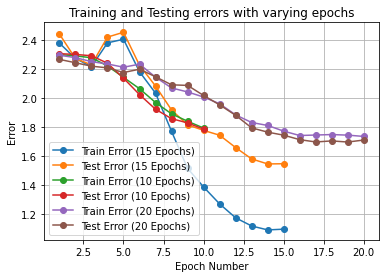

In [12]:
# Plot #
from matplotlib import pyplot as plt
epochs = np.arange(1,16)
plt.plot(epochs,train_error,label='Train Error (15 Epochs)',marker='o')
plt.plot(epochs,test_error,label='Test Error (15 Epochs)',marker='o')
epochs1 = np.arange(1,11)
plt.plot(epochs1,train_error_31,label='Train Error (10 Epochs)',marker='o')
plt.plot(epochs1,test_error_31,label='Test Error (10 Epochs)',marker='o')
epochs2 = np.arange(1,21)
plt.plot(epochs2,train_error_32,label='Train Error (20 Epochs)',marker='o')
plt.plot(epochs2,test_error_32,label='Test Error (20 Epochs)',marker='o')
plt.title("Training and Testing errors with varying epochs")
plt.ylabel("Error")
plt.xlabel("Epoch Number")
plt.legend()
plt.grid()

## Question 3

### Part (a)

In [13]:
#3a#
# RMS prop #
num_epochs = 15
train_error_plt = []
test_error_plt = []
for t in range(num_epochs):
    model_3.train()
    for m in range(0,len(train_labels),batch_size):
        preds = model_3.forward(train_images[m:m+batch_size])
        loss = criterion(preds,train_labels[m:m+batch_size])
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()
    with torch.no_grad():
        model_3.eval()
        pred_train = model_3.forward(train_images)
        train_loss = criterion(pred_train,train_labels)
        train_error_plt.append(train_loss)
        pred_test = model_3.forward(test_images)
        test_loss = criterion(pred_test,test_labels)
        test_error_plt.append(test_loss)
        
    print('Epoch:',t+1)
    print('train Error:',train_loss,'Test Error:',test_loss)
    shuff_data(train_images,train_labels)

Epoch: 1
train Error: tensor(1.1514) Test Error: tensor(1.6244)
Epoch: 2
train Error: tensor(1.1199) Test Error: tensor(1.5991)
Epoch: 3
train Error: tensor(1.3923) Test Error: tensor(1.9698)
Epoch: 4
train Error: tensor(1.2330) Test Error: tensor(1.7854)
Epoch: 5
train Error: tensor(1.8341) Test Error: tensor(2.4357)
Epoch: 6
train Error: tensor(1.2691) Test Error: tensor(1.7675)
Epoch: 7
train Error: tensor(1.3415) Test Error: tensor(1.8250)
Epoch: 8
train Error: tensor(0.7556) Test Error: tensor(1.0570)
Epoch: 9
train Error: tensor(0.5383) Test Error: tensor(0.7750)
Epoch: 10
train Error: tensor(0.6304) Test Error: tensor(1.0935)
Epoch: 11
train Error: tensor(0.8422) Test Error: tensor(1.3250)
Epoch: 12
train Error: tensor(0.4631) Test Error: tensor(0.7169)
Epoch: 13
train Error: tensor(0.6284) Test Error: tensor(0.8526)
Epoch: 14
train Error: tensor(0.5353) Test Error: tensor(0.9194)
Epoch: 15
train Error: tensor(0.4388) Test Error: tensor(0.8027)


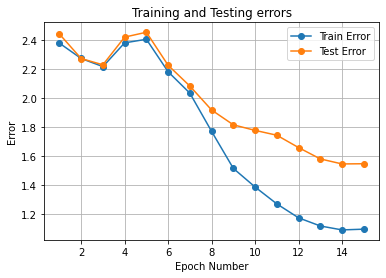

In [14]:
from matplotlib import pyplot as plt
epochs = np.arange(1,16)
plt.plot(epochs,train_error,label='Train Error',marker='o')
plt.plot(epochs,test_error,label='Test Error',marker='o')
plt.title("Training and Testing errors")
plt.ylabel("Error")
plt.xlabel("Epoch Number")
plt.legend()
plt.grid()

### Part (b)

In [15]:
#3b#
num_epochs = 15
activation_1 = []
activation_2 = []
sample_image = train_images[1]
for t in range(num_epochs):
    model_3.train()
    for m in range(0,len(train_labels),batch_size):
        preds = model_3.forward(train_images[m:m+batch_size])
        loss = criterion(preds,train_labels[m:m+batch_size])
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()
    act_vol1 = model_3.conv_1(sample_image)
    activation_1.append(act_vol1)
    act_vol2 = model_3.conv_2(act_vol1)
    activation_2.append(act_vol2)
    shuff_data(train_images,train_labels)

In [16]:
activation_1[1].size()

torch.Size([4, 14, 14])

Epoch: 1


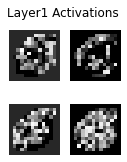

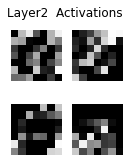

Epoch: 2


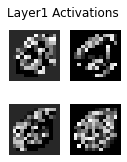

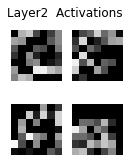

Epoch: 3


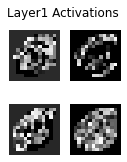

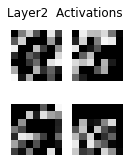

Epoch: 4


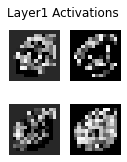

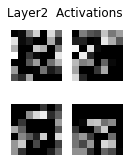

Epoch: 5


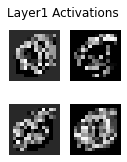

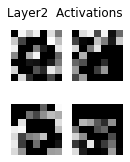

Epoch: 6


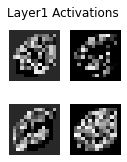

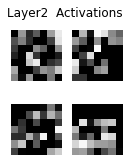

Epoch: 7


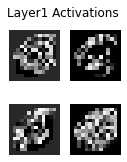

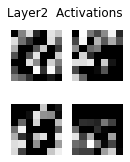

Epoch: 8


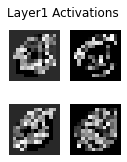

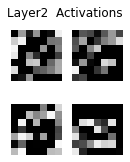

Epoch: 9


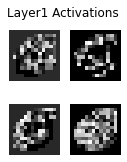

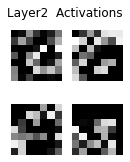

Epoch: 10


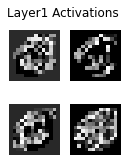

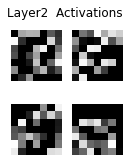

Epoch: 11


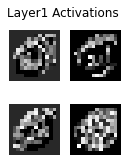

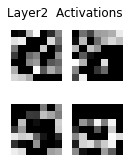

Epoch: 12


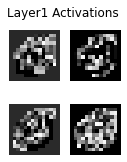

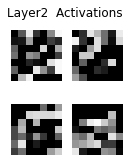

Epoch: 13


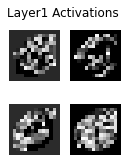

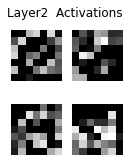

Epoch: 14


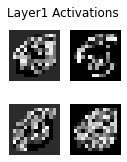

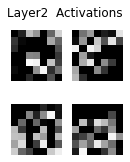

Epoch: 15


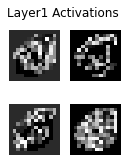

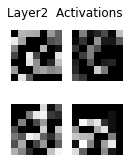

In [17]:
for t in range(num_epochs):
    print('Epoch:',t+1)
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(torchvision.transforms.ToPILImage()(activation_1[t][i])
                  ,cmap='gray', vmin=0, vmax=255)
        
        plt.axis('off')
        plt.gcf().set_size_inches(2,2.5)
        plt.suptitle("Layer1 Activations")
    plt.show()
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(torchvision.transforms.ToPILImage()(activation_2[t][i])
                  ,cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.gcf().set_size_inches(2,2.5)
        plt.suptitle("Layer2  Activations")
    plt.show()

### Part(c)

In [37]:
# 3c #
from sklearn.metrics import accuracy_score
# RMS prop #
print('Accuracies of RMS prop')
num_epochs = 15
for t in range(num_epochs):
    model_3.train()
    for m in range(0,len(train_labels),batch_size):
        preds = model_3.forward(train_images[m:m+batch_size])
        loss = criterion(preds,train_labels[m:m+batch_size])
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()
    with torch.no_grad():
        model_3.eval()
        pred_test = model_3.forward(test_images)
        prob = list(pred_test.numpy())
        predictions = np.argmax(prob, axis=1)
        acc = accuracy_score(test_labels, predictions)
        print('Epoch:',t+1)
        print('Accuracy=',format(acc,".2f"))
        
    shuff_data(train_images,train_labels)
    

Accuracies of RMS prop
Epoch: 1
Accuracy= 0.87
Epoch: 2
Accuracy= 0.87
Epoch: 3
Accuracy= 0.84
Epoch: 4
Accuracy= 0.88
Epoch: 5
Accuracy= 0.87
Epoch: 6
Accuracy= 0.87
Epoch: 7
Accuracy= 0.87
Epoch: 8
Accuracy= 0.87
Epoch: 9
Accuracy= 0.87
Epoch: 10
Accuracy= 0.87
Epoch: 11
Accuracy= 0.83
Epoch: 12
Accuracy= 0.87
Epoch: 13
Accuracy= 0.87
Epoch: 14
Accuracy= 0.87
Epoch: 15
Accuracy= 0.87


## Question 4

In [19]:
# Q4 #
import warnings 
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
num_epochs = 15
for t in range(num_epochs):
    model_3.train()
    for m in range(0,len(train_labels),batch_size):
        preds = model_3.forward(train_images[m:m+batch_size])
        loss = criterion(preds,train_labels[m:m+batch_size])
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()
    if (t == 0):
        f = model_3.conv_1(test_images)
        f = model_3.conv_2(f)
        f = torch.flatten(f, 1)
        plt_1 = TSNE(n_components=2).fit_transform(f.detach().numpy())
    if (t == num_epochs-1):
        f = model_3.conv_1(test_images)
        f = model_3.conv_2(f)
        f = torch.flatten(f, 1)
        plt_2 = TSNE(n_components=2).fit_transform(f.detach().numpy())
        
    shuff_data(train_images,train_labels)
    

/home/datta/python/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/datta/python/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/datta/python/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/datta/python/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


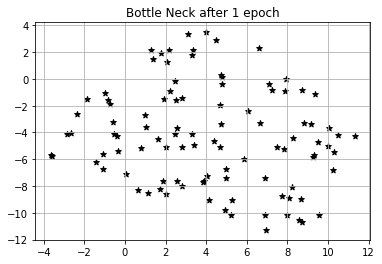

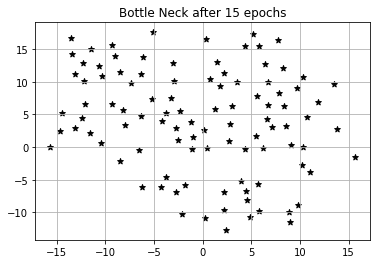

In [20]:
plt.scatter(plt_1[:,0],plt_1[:,1],marker='*',c='black')
plt.title("Bottle Neck after 1 epoch")
plt.grid()
plt.show()
plt.scatter(plt_2[:,0],plt_2[:,1],marker='*',c='black')
plt.title("Bottle Neck after 15 epochs")
plt.grid()
plt.show()

As the number of epochs increases, the samples tend to form clusters. The sample would classify much better if the number of epochs were increased.

## Question 5

In [39]:
print("HW4 train error:", 0.573)
print("HW4 test error:", 0.86)
print("HW4 running time in seconds:", 342 )
print("HW4 accuracy:", 0.94)
print("HW5 train error:",1.14)
print("HW5 test error:",1.53 )
print("HW5 running time in seconds:",45  )
print("HW5 accuracy:",0.87 )

HW4 train error: 0.573
HW4 test error: 0.86
HW4 running time in seconds: 342
HW4 accuracy: 0.94
HW5 train error: 1.14
HW5 test error: 1.53
HW5 running time in seconds: 45
HW5 accuracy: 0.87


## Question 6

For this section of the homework, I created a new architecture with dropout layer in addition.

In [21]:
# Q6 #
## Architecture ##
class CNN_drop(Module):
    def __init__(self,drop_rate):
        super(CNN_drop,self).__init__()
        self.conv_1= Sequential(
        # Layer-1 #
            Conv2d(1,4,kernel_size=5,stride=1,padding='same'),
            ReLU(),
            MaxPool2d(kernel_size=2,stride=2),
        )
        self.conv_2 = Sequential(
        # Layer-2 #
            Conv2d(4,4,kernel_size=5,stride=1,padding='same'),
            ReLU(),
            MaxPool2d(kernel_size=2,stride=2),
        )
        self.linear_layers = Sequential(
            Linear(in_features = 4*7*7,out_features = 49),
            Dropout(drop_rate), # Dropout Layer #
            ReLU(),
            Linear(in_features=49,out_features = 10),
            ReLU(),
        ) 
    def forward(self,x):
        x = self.conv_1(x)
        x = self.conv_2(x)
        x = torch.flatten(x,1)
        x = self.linear_layers(x)
        soft = nn.LogSoftmax(dim=1)
        #x = soft(x)
        return x

In [22]:
## For Drop Rate = 0.2 ##
print('For Drop rate = 0.2')
model1 = CNN_drop(drop_rate =0.2)
optimizer = optim.RMSprop(model1.parameters(),lr=0.001,alpha=0.9)
criterion = CrossEntropyLoss()

num_epochs = 15
train_error_2 = []
test_error_2 = []
for t in range(num_epochs):
    model1.train()
    for m in range(0,len(train_labels),batch_size):
        preds = model1.forward(train_images[m:m+batch_size])
        loss = criterion(preds,train_labels[m:m+batch_size])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        model1.eval()
        pred_train = model1.forward(train_images)
        train_loss = criterion(pred_train,train_labels)
        train_error_2.append(train_loss)
        pred_test = model1.forward(test_images)
        test_loss = criterion(pred_test,test_labels)
        test_error_2.append(test_loss)
        
    print('Epoch:',t+1)
    print('train Error:',train_loss,'Test Error:',test_loss)
    shuff_data(train_images,train_labels)

For Drop rate = 0.2
Epoch: 1
train Error: tensor(2.7279) Test Error: tensor(2.7602)
Epoch: 2
train Error: tensor(2.2389) Test Error: tensor(2.2725)
Epoch: 3
train Error: tensor(2.3633) Test Error: tensor(2.4206)
Epoch: 4
train Error: tensor(1.9096) Test Error: tensor(2.0462)
Epoch: 5
train Error: tensor(1.7027) Test Error: tensor(1.8269)
Epoch: 6
train Error: tensor(1.6763) Test Error: tensor(1.8059)
Epoch: 7
train Error: tensor(1.5497) Test Error: tensor(1.7009)
Epoch: 8
train Error: tensor(1.4277) Test Error: tensor(1.5995)
Epoch: 9
train Error: tensor(1.3984) Test Error: tensor(1.5465)
Epoch: 10
train Error: tensor(1.4345) Test Error: tensor(1.5454)
Epoch: 11
train Error: tensor(1.4448) Test Error: tensor(1.5361)
Epoch: 12
train Error: tensor(1.4480) Test Error: tensor(1.5240)
Epoch: 13
train Error: tensor(1.5450) Test Error: tensor(1.6268)
Epoch: 14
train Error: tensor(1.7041) Test Error: tensor(1.8237)
Epoch: 15
train Error: tensor(1.2918) Test Error: tensor(1.5177)


In [23]:
## For Drop Rate = 0.2 ##
print('For Drop rate = 0.5')
model2 = CNN_drop(drop_rate =0.5)
optimizer = optim.RMSprop(model2.parameters(),lr=0.001,alpha=0.9)
criterion = CrossEntropyLoss()

num_epochs = 15
train_error_5 = []
test_error_5 = []
for t in range(num_epochs):
    model2.train()
    for m in range(0,len(train_labels),batch_size):
        preds = model2.forward(train_images[m:m+batch_size])
        loss = criterion(preds,train_labels[m:m+batch_size])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        model2.eval()
        pred_train = model2.forward(train_images)
        train_loss = criterion(pred_train,train_labels)
        train_error_5.append(train_loss)
        pred_test = model2.forward(test_images)
        test_loss = criterion(pred_test,test_labels)
        test_error_5.append(test_loss)
        
    print('Epoch:',t+1)
    print('train Error:',train_loss,'Test Error:',test_loss)
    shuff_data(train_images,train_labels)

For Drop rate = 0.5
Epoch: 1
train Error: tensor(2.2387) Test Error: tensor(2.2555)
Epoch: 2
train Error: tensor(2.2023) Test Error: tensor(2.2094)
Epoch: 3
train Error: tensor(2.0720) Test Error: tensor(2.0623)
Epoch: 4
train Error: tensor(1.9305) Test Error: tensor(1.9313)
Epoch: 5
train Error: tensor(1.7675) Test Error: tensor(1.8434)
Epoch: 6
train Error: tensor(1.5409) Test Error: tensor(1.6181)
Epoch: 7
train Error: tensor(1.4123) Test Error: tensor(1.5415)
Epoch: 8
train Error: tensor(1.2548) Test Error: tensor(1.4298)
Epoch: 9
train Error: tensor(1.1172) Test Error: tensor(1.3412)
Epoch: 10
train Error: tensor(0.9795) Test Error: tensor(1.2144)
Epoch: 11
train Error: tensor(0.8854) Test Error: tensor(1.0502)
Epoch: 12
train Error: tensor(0.8011) Test Error: tensor(0.9809)
Epoch: 13
train Error: tensor(0.6872) Test Error: tensor(0.8061)
Epoch: 14
train Error: tensor(0.6893) Test Error: tensor(0.8227)
Epoch: 15
train Error: tensor(0.6329) Test Error: tensor(0.7632)


In [24]:
## For Drop Rate = 0.2 ##
print('For Drop rate = 0.8')
model3 = CNN_drop(drop_rate =0.8)
optimizer = optim.RMSprop(model3.parameters(),lr=0.001,alpha=0.9)
criterion = CrossEntropyLoss()

num_epochs = 15
train_error_8 = []
test_error_8 = []
for t in range(num_epochs):
    model3.train()
    for m in range(0,len(train_labels),batch_size):
        preds = model3.forward(train_images[m:m+batch_size])
        loss = criterion(preds,train_labels[m:m+batch_size])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        model3.eval()
        pred_train = model3.forward(train_images)
        train_loss = criterion(pred_train,train_labels)
        train_error_8.append(train_loss)
        pred_test = model3.forward(test_images)
        test_loss = criterion(pred_test,test_labels)
        test_error_8.append(test_loss)
        
    print('Epoch:',t+1)
    print('train Error:',train_loss,'Test Error:',test_loss)
    shuff_data(train_images,train_labels)

For Drop rate = 0.8
Epoch: 1
train Error: tensor(2.2899) Test Error: tensor(2.2778)
Epoch: 2
train Error: tensor(2.2498) Test Error: tensor(2.2414)
Epoch: 3
train Error: tensor(2.2121) Test Error: tensor(2.2146)
Epoch: 4
train Error: tensor(2.1559) Test Error: tensor(2.1681)
Epoch: 5
train Error: tensor(2.0674) Test Error: tensor(2.0820)
Epoch: 6
train Error: tensor(2.0055) Test Error: tensor(2.0480)
Epoch: 7
train Error: tensor(1.8934) Test Error: tensor(1.9459)
Epoch: 8
train Error: tensor(1.8415) Test Error: tensor(1.9399)
Epoch: 9
train Error: tensor(1.7535) Test Error: tensor(1.7953)
Epoch: 10
train Error: tensor(1.6371) Test Error: tensor(1.7157)
Epoch: 11
train Error: tensor(1.6147) Test Error: tensor(1.6828)
Epoch: 12
train Error: tensor(1.4693) Test Error: tensor(1.6025)
Epoch: 13
train Error: tensor(1.5034) Test Error: tensor(1.6043)
Epoch: 14
train Error: tensor(1.4130) Test Error: tensor(1.5548)
Epoch: 15
train Error: tensor(1.3581) Test Error: tensor(1.5326)


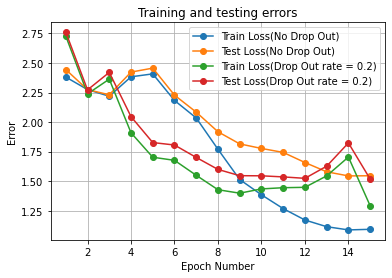

In [25]:
# plots #
epochs = np.arange(1,16)
plt.plot(epochs,train_error,label='Train Loss(No Drop Out)',marker = 'o')
plt.plot(epochs,test_error,label='Test Loss(No Drop Out)',marker='o')
plt.plot(epochs,train_error_2,label='Train Loss(Drop Out rate = 0.2)',marker = 'o')
plt.plot(epochs,test_error_2,label='Test Loss(Drop Out rate = 0.2)',marker = 'o')
plt.title("Training and testing errors")
plt.ylabel("Error")
plt.xlabel("Epoch Number")
plt.legend()
plt.grid()

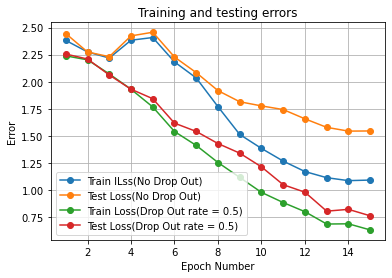

In [26]:
epochs = np.arange(1,16)
plt.plot(epochs,train_error,label='Train lLss(No Drop Out)',marker = 'o')
plt.plot(epochs,test_error,label='Test Loss(No Drop Out)',marker='o')
plt.plot(epochs,train_error_5,label='Train Loss(Drop Out rate = 0.5)',marker = 'o')
plt.plot(epochs,test_error_5,label='Test Loss(Drop Out rate = 0.5)',marker = 'o')
plt.title("Training and testing errors")
plt.ylabel("Error")
plt.xlabel("Epoch Number")
plt.legend()
plt.grid()

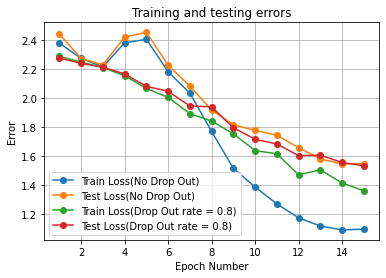

In [27]:
epochs = np.arange(1,16)
plt.plot(epochs,train_error,label='Train Loss(No Drop Out)',marker = 'o')
plt.plot(epochs,test_error,label='Test Loss(No Drop Out)',marker='o')
plt.plot(epochs,train_error_8,label='Train Loss(Drop Out rate = 0.8)',marker = 'o')
plt.plot(epochs,test_error_8,label='Test Loss(Drop Out rate = 0.8)',marker = 'o')
plt.title("Training and testing errors")
plt.ylabel("Error")
plt.xlabel("Epoch Number")
plt.legend()
plt.grid()

When compared to architectures without dropout layers, test and train loss decreases at a faster rate. It would be even better if we increase the number of Epochs.

## Question 7

In [28]:
# Q7 #
## Architecture ##
class CNN_drop_batch(Module):
    def __init__(self,drop_rate):
        super(CNN_drop_batch,self).__init__()
        self.conv_1= Sequential(
        # Layer-1 #
            Conv2d(1,4,kernel_size=5,stride=1,padding='same'),
            ReLU(),
            MaxPool2d(kernel_size=2,stride=2),
        )
        self.conv_2 = Sequential(
        # Layer-2 #
            Conv2d(4,4,kernel_size=5,stride=1,padding='same'),
            ReLU(),
            MaxPool2d(kernel_size=2,stride=2),
        )
        self.linear_layers = Sequential(
            Linear(in_features = 4*7*7,out_features = 49),
            Dropout(drop_rate),
            BatchNorm1d(49),
            ReLU(),
            Linear(in_features=49,out_features = 10),
            ReLU(),
        ) 
    def forward(self,x):
        x = self.conv_1(x)
        x = self.conv_2(x)
        x = torch.flatten(x,1)
        x = self.linear_layers(x)
        soft = nn.LogSoftmax(dim=1)
        #x = soft(x)
        return x

In [29]:
model = CNN_drop_batch(drop_rate =0.2)
optimizer = optim.RMSprop(model.parameters(),lr=0.001,alpha=0.9)
criterion = CrossEntropyLoss()

num_epochs = 15
train_error_b = []
test_error_b = []
for t in range(num_epochs):
    model.train()
    for m in range(0,len(train_labels),batch_size):
        preds = model.forward(train_images[m:m+batch_size])
        loss = criterion(preds,train_labels[m:m+batch_size])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        model.eval()
        pred_train = model.forward(train_images)
        train_loss = criterion(pred_train,train_labels)
        train_error_b.append(train_loss)
        pred_test = model.forward(test_images)
        test_loss = criterion(pred_test,test_labels)
        test_error_b.append(test_loss)
        
    print('Epoch:',t+1)
    print('train Error:',train_loss,'Test Error:',test_loss)
    shuff_data(train_images,train_labels)

Epoch: 1
train Error: tensor(2.2963) Test Error: tensor(2.2674)
Epoch: 2
train Error: tensor(2.2673) Test Error: tensor(2.2491)
Epoch: 3
train Error: tensor(2.2519) Test Error: tensor(2.2219)
Epoch: 4
train Error: tensor(2.2430) Test Error: tensor(2.2096)
Epoch: 5
train Error: tensor(2.2091) Test Error: tensor(2.1852)
Epoch: 6
train Error: tensor(2.1947) Test Error: tensor(2.1764)
Epoch: 7
train Error: tensor(2.1900) Test Error: tensor(2.1859)
Epoch: 8
train Error: tensor(2.1691) Test Error: tensor(2.1663)
Epoch: 9
train Error: tensor(2.1475) Test Error: tensor(2.1619)
Epoch: 10
train Error: tensor(2.1389) Test Error: tensor(2.1574)
Epoch: 11
train Error: tensor(2.1313) Test Error: tensor(2.1631)
Epoch: 12
train Error: tensor(2.1112) Test Error: tensor(2.1435)
Epoch: 13
train Error: tensor(2.0958) Test Error: tensor(2.1409)
Epoch: 14
train Error: tensor(2.0604) Test Error: tensor(2.1049)
Epoch: 15
train Error: tensor(2.0742) Test Error: tensor(2.1260)


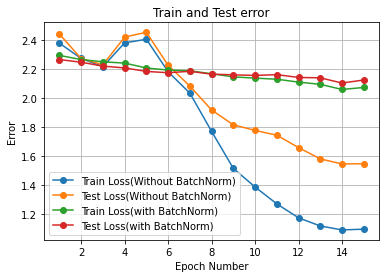

In [30]:
epochs = np.arange(1,16)
plt.plot(epochs,train_error,label='Train Loss(Without BatchNorm)',marker = 'o')
plt.plot(epochs,test_error,label='Test Loss(Without BatchNorm)',marker='o')
plt.plot(epochs,train_error_b,label='Train Loss(with BatchNorm)',marker = 'o')
plt.plot(epochs,test_error_b,label='Test Loss(with BatchNorm)',marker = 'o')
plt.title("Train and Test error")
plt.ylabel("Error")
plt.xlabel("Epoch Number")
plt.legend()
plt.grid()
plt.show()

Using batch norm and dropout layers enhances accuracy when compared to vanilla and simply dropout layers.